In [83]:
import pandas as pd
import numpy as np

## Data preprocessing

In [118]:
df = pd.read_csv("./placement.csv")

In [119]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<AxesSubplot:xlabel='cgpa', ylabel='placement_exam_marks'>

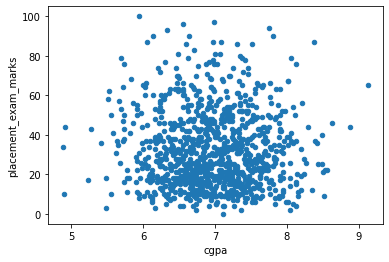

In [120]:
df.plot.scatter(x="cgpa", y="placement_exam_marks")

In [121]:
df.sort_values(by="placement_exam_marks", ascending=False)

,cgpa,placement_exam_marks,placed
917,5.95,100.0,0
846,6.99,97.0,0
630,6.56,96.0,1
9,7.75,94.0,1
134,6.33,93.0,0
...,...,...,...
74,6.16,3.0,1
701,6.74,2.0,1
863,8.04,2.0,1
943,7.36,2.0,0


In [122]:
df.drop(columns=["placed"], inplace=True)

In [123]:
df.head()

,cgpa,placement_exam_marks
0,7.19,26.0
1,7.46,38.0
2,7.54,40.0
3,6.42,8.0
4,7.23,17.0


## Spliting data

In [124]:
train = df.sample(frac=0.7, random_state=1)

In [125]:
test = df.drop(train.index)

# Linear Regression
- Using formula

$$m\  (slope) = \cfrac{(\Sigma y)(\Sigma x^2) - (\Sigma x)(\Sigma xy)}{n(\Sigma x^2) - (\Sigma x)^2}$$

$$c \ \ (intercept) = \cfrac{n(\Sigma xy) - (\Sigma x)(\Sigma y)}{n(\Sigma x^2) - (\Sigma x)^2}$$

In [126]:
# Here x is CGPA and y is LPA
X = train.cgpa.to_numpy()
Y = train.placement_exam_marks.to_numpy()

In [127]:
m = (np.sum(Y)*np.sum(X**2) - np.sum(X)*np.sum(X*Y))/(len(X)*np.sum(X**2) - (np.sum(X))**2)

In [128]:
c = (len(X)*np.sum(X*Y) - np.sum(X)*np.sum(Y))/(len(X)*np.sum(X**2) - (np.sum(X))**2)

In [129]:
print(f"{c} x + {m} = y")

-1.5084801735559032 x + 42.770412022137315 = y


In [130]:
test["pred"] = test.cgpa * c + m

In [131]:
test.head()

,cgpa,placement_exam_marks,pred
7,7.12,39.0,32.030033
10,6.82,16.0,32.482577
15,7.10,21.0,32.060203
20,6.69,47.0,32.678680
21,7.43,33.0,31.562404


In [132]:
test["err"] = test.pred - test.placement_exam_marks

In [133]:
test.head()

,cgpa,placement_exam_marks,pred,err
7,7.12,39.0,32.030033,-6.969967
10,6.82,16.0,32.482577,16.482577
15,7.10,21.0,32.060203,11.060203
20,6.69,47.0,32.678680,-14.321320
21,7.43,33.0,31.562404,-1.437596


In [134]:
test.err.mean()*100

14.839832924188471

In [135]:
np.sqrt(np.mean((test.err.to_numpy())**2))*100

1861.1787555098076

<AxesSubplot:xlabel='cgpa', ylabel='placement_exam_marks'>

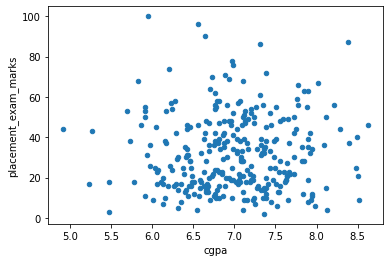

In [136]:
test.plot.scatter(x="cgpa", y="placement_exam_marks")

<AxesSubplot:xlabel='cgpa', ylabel='pred'>

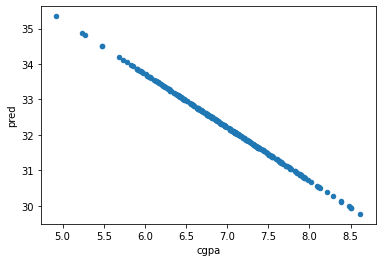

In [137]:
test.plot.scatter(x="cgpa", y="pred")

<AxesSubplot:xlabel='cgpa'>

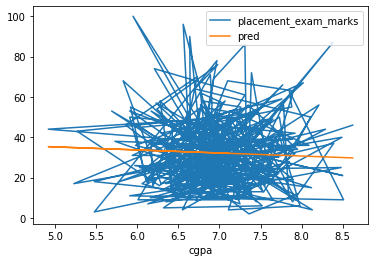

In [142]:
(test.set_index("cgpa"))[["placement_exam_marks", "pred"]].plot()

## Dummy Data

In [104]:
df = pd.read_csv("./dummy_data.csv")
df.head()

,Unnamed: 0,x,y
0,0,0.000000,-3.951550
1,1,0.291291,-2.728507
2,2,0.582583,-2.357441
3,3,0.873874,-1.327898
4,4,1.165165,-0.858028


In [105]:
df.drop(columns=["Unnamed: 0"], inplace=True)

<AxesSubplot:xlabel='x', ylabel='y'>

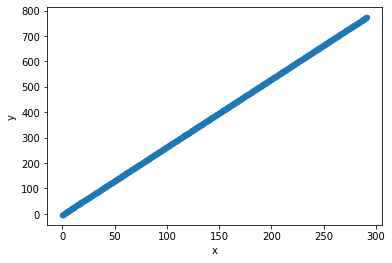

In [106]:
df.plot.scatter(x="x", y="y")

In [107]:
train = df.sample(frac=0.7, random_state=1)

In [108]:
test = df.drop(train.index)

In [109]:
x = train.x.to_numpy()
y = train.y.to_numpy()

In [110]:
m = (np.sum(y)*np.sum(x**2) - np.sum(x)*np.sum(x*y))/(len(x)*np.sum(x**2) - (np.sum(x))**2)

In [111]:
c = (len(x)*np.sum(x*y) - np.sum(x)*np.sum(y))/(len(x)*np.sum(x**2) - (np.sum(x))**2)

In [112]:
test["pred"] = test.x * c + m

In [113]:
test["err"] = test.pred - test.y

In [114]:
test.head()

,x,y,pred,err
7,2.039039,1.470356,1.867205,0.396848
10,2.912913,4.161429,4.200418,0.038988
15,4.369369,7.623208,8.089106,0.465898
20,5.825826,12.181609,11.977794,-0.203814
21,6.117117,12.909466,12.755532,-0.153934


In [115]:
test.err.mean()

-0.0033857169643984647

<AxesSubplot:xlabel='x', ylabel='pred'>

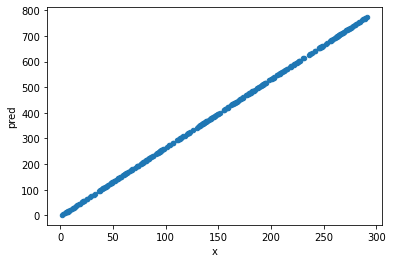

In [116]:
test.plot.scatter(x="x", y="pred")

<AxesSubplot:xlabel='x', ylabel='y'>

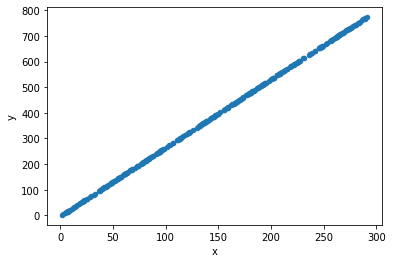

In [117]:
test.plot.scatter(x="x", y="y")